Naive Bayes Lab Task

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('advertising_ef.csv')

In [4]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Gender,Country,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Wrightburgh,Female,Tunisia,0
1,NaN,31.0,68441.85,193.77,West Jodi,Male,Nauru,0
2,69.47,26.0,59785.94,236.50,Davidton,Female,San Marino,0
3,74.15,29.0,54806.18,245.89,West Terrifurt,Male,Italy,0
4,68.37,35.0,73889.99,225.58,South Manuel,Female,Iceland,0
...,...,...,...,...,...,...,...,...
1004,72.97,30.0,71384.57,208.58,Duffystad,Male,Lebanon,1
1005,51.30,45.0,67782.17,134.42,New Darlene,Male,Bosnia and Herzegovina,1
1006,51.63,51.0,42415.72,120.37,South Jessica,Male,Mongolia,1
1007,55.55,19.0,41920.79,187.95,West Steven,Female,Guatemala,0


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1005.000000,998.000000,998.000000,1005.000000,1009.000000
mean,65.009463,35.962926,54958.573617,180.041920,0.501487
std,15.879997,8.772142,13381.286752,43.923438,0.500246
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,51.300000,29.000000,46993.367500,138.870000,0.000000
50%,68.370000,35.000000,56998.245000,183.420000,1.000000
75%,78.570000,42.000000,65267.402500,218.800000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


After analyzing the summary from the `describe()` function, I noticed that some numerical columns contain missing values. To handle this, I filled the empty values with the mean of each respective column using the `fillna()` function. I chose the mean as the replacement method because the summary statistics showed no significant outliers in the numerical data. This ensures that the missing values are handled without affecting the overall distribution of the dataset.


In [7]:
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(),inplace=True)
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Area Income'].fillna(df['Area Income'].mean(),inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(),inplace=True)

After filling the missing values in the numerical columns, I moved to the categorical columns. To check for any empty values, I used the `isnull()` function. This helps identify missing data in categorical features.

In [9]:
print(df["City"].isnull().sum())
print(df["Gender"].isnull().sum())
print(df["Country"].isnull().sum())

11
0
13


The categorical columns also contained empty values. To handle these, I used the `fillna()` function to replace the missing values with the mode of each respective column. 

In [11]:
df['City'].fillna(df['City'].mode()[0],inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Country'].fillna(df['Country'].mode()[0],inplace=True)

In [12]:
print(df["City"].isnull().sum())
print(df["Gender"].isnull().sum())
print(df["Country"].isnull().sum())

0
0
0


In [13]:
print("City\n",df['City'].nunique())
print("\nGender\n",df['Gender'].unique())
print("\nCountry\n",df['Country'].nunique())

City
 961

Gender
 ['Female' 'Male']

Country
 237


I chose a hybrid approach to train the model because the dataset contains both numerical and categorical features. To implement this, I divided the dataset into two separate datasets:  
1. One dataset contains all numerical columns along with the target column.  
2. The other dataset contains all categorical columns along with the target column.  

This allows me to apply different Naïve Bayes models suited for each data type and later combine their predictions.


In [15]:
ndf=df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Clicked on Ad']]
cdf=df[['City','Gender','Country','Clicked on Ad']]

In [16]:
ndf

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.950000,35.0,61833.90,256.09,0
1,65.009463,31.0,68441.85,193.77,0
2,69.470000,26.0,59785.94,236.50,0
3,74.150000,29.0,54806.18,245.89,0
4,68.370000,35.0,73889.99,225.58,0
...,...,...,...,...,...
1004,72.970000,30.0,71384.57,208.58,1
1005,51.300000,45.0,67782.17,134.42,1
1006,51.630000,51.0,42415.72,120.37,1
1007,55.550000,19.0,41920.79,187.95,0


In [17]:
ndf.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,65.009463,35.962926,54958.573617,180.041920,0.501487
std,15.848458,8.724147,13308.073492,43.836202,0.500246
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,51.380000,29.000000,47160.530000,139.010000,0.000000
50%,68.250000,35.000000,56791.750000,182.650000,1.000000
75%,78.540000,42.000000,65186.580000,218.790000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


In [18]:
ndf.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.328097,0.310472,0.514308,-0.742964
Age,-0.328097,1.000000,-0.178252,-0.366250,0.487946
Area Income,0.310472,-0.178252,1.000000,0.331394,-0.472515
Daily Internet Usage,0.514308,-0.366250,0.331394,1.000000,-0.785501
Clicked on Ad,-0.742964,0.487946,-0.472515,-0.785501,1.000000


I chose to include all columns in the training process because each feature has a relationship with the target column. Ignoring any column could lead to a loss of important information and may reduce the model's accuracy.


In [20]:
NX=ndf[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]
ny=ndf['Clicked on Ad']
NX_train,NX_test,ny_train,ny_test = train_test_split(NX,ny,test_size=0.2,random_state=42)

I used the Gaussian Naive Bayes algorithm for the numerical dataset.

In [22]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(NX_train, ny_train)

GaussianNB()

In [23]:
ny_pred = gaussian_nb.predict(NX_test)

In [24]:
print("Accuracy:", accuracy_score(ny_test, ny_pred))

Accuracy: 0.9554455445544554


After training the Gaussian model on the numerical dataset, I achieved an accuracy of 95.5%, which is outstanding. This indicates that the numerical features alone are highly effective in predicting the target variable.


In [26]:
print("Classification Report:\n", classification_report(ny_test, ny_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        96
           1       0.95      0.96      0.96       106

    accuracy                           0.96       202
   macro avg       0.96      0.96      0.96       202
weighted avg       0.96      0.96      0.96       202



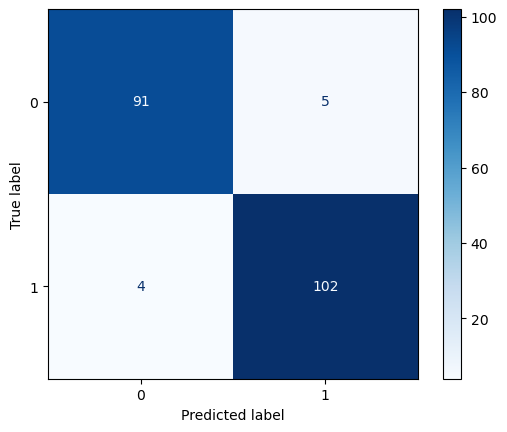

In [27]:
ncm = confusion_matrix(ny_test, ny_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=ncm)
disp.plot(cmap="Blues")
plt.show()

In [28]:
cdf

,City,Gender,Country,Clicked on Ad
0,Wrightburgh,Female,Tunisia,0
1,West Jodi,Male,Nauru,0
2,Davidton,Female,San Marino,0
3,West Terrifurt,Male,Italy,0
4,South Manuel,Female,Iceland,0
...,...,...,...,...
1004,Duffystad,Male,Lebanon,1
1005,New Darlene,Male,Bosnia and Herzegovina,1
1006,South Jessica,Male,Mongolia,1
1007,West Steven,Female,Guatemala,0


To prepare the categorical data for the model, I applied different encoding techniques based on the feature type:  
- Label Encoding for the Gender column, as it contains only two unique values.  
- Frequency Encoding for the Country and City columns, as they have multiple unique categories.
  
This ensures that categorical variables are transformed into numerical format while preserving their importance in the dataset.

In [30]:
label_encoder = LabelEncoder()
cdf["Gender"] = label_encoder.fit_transform(cdf["Gender"])  # Male → 0, Female → 1

for col in ["City", "Country"]:
    freq_map = cdf[col].value_counts().to_dict()  
    cdf[col] = cdf[col].map(freq_map)

In [31]:
cdf

,City,Gender,Country,Clicked on Ad
0,2,0,4,0
1,1,1,3,0
2,1,0,4,0
3,1,1,5,0
4,1,0,3,0
...,...,...,...,...
1004,1,1,5,1
1005,1,1,7,1
1006,1,1,5,1
1007,2,0,5,0


In [32]:
cdf.corr()

,City,Gender,Country,Clicked on Ad
City,1.000000,0.014416,-0.028071,0.002094
Gender,0.014416,1.000000,0.022243,-0.038563
Country,-0.028071,0.022243,1.000000,-0.032560
Clicked on Ad,0.002094,-0.038563,-0.032560,1.000000


After analyzing the correlation table, I decided to include the Gender and Country columns in the training process because they show some relationship with the target variable. However, I chose to exclude the City column since it has no significant correlation with the target, meaning it would not contribute effectively to the model's performance.


In [34]:
CX=cdf[['Gender','Country']]
cy=cdf['Clicked on Ad']
CX_train,CX_test,cy_train,cy_test = train_test_split(CX,cy,test_size=0.2,random_state=42)

I used the Multinomial Naive Bayes algorithm for the categorical dataset

In [36]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(CX_train, cy_train)

MultinomialNB()

In [37]:
cy_pred = multinomial_nb.predict(CX_test)

In [38]:
print("Accuracy:", accuracy_score(cy_test, cy_pred))

Accuracy: 0.5148514851485149


After training the Multinomial model on the categorical dataset, I achieved an accuracy of 51.4%, which is not good. This indicates that the categorical features alone do not provide strong predictive power for the target variable.

In [40]:
print("Classification Report:\n", classification_report(cy_test, cy_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.55      0.52        96
           1       0.54      0.48      0.51       106

    accuracy                           0.51       202
   macro avg       0.52      0.52      0.51       202
weighted avg       0.52      0.51      0.51       202



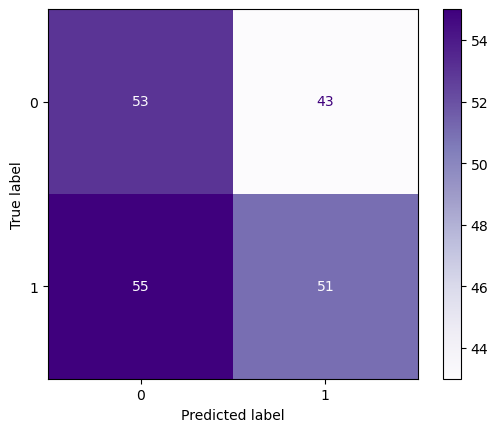

In [41]:
ccm = confusion_matrix(cy_test, cy_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=ccm)
disp.plot(cmap="Purples")
plt.show()

In [42]:
num_probs = gaussian_nb.predict_proba(NX_test)
cat_probs = multinomial_nb.predict_proba(CX_test)

In [43]:
final_probs = num_probs * cat_probs 
final_preds = np.argmax(final_probs, axis=1)

In [44]:
print("Final Hybrid Model Accuracy:", accuracy_score(ny_test, final_preds))

Final Hybrid Model Accuracy: 0.9554455445544554


After combining the predictions from both the Gaussian and Multinomial models, I achieved a final accuracy of 95.5%. This confirms that the numerical features played a dominant role in the prediction, while the categorical features had minimal impact on improving the model's performance.

In [46]:
print("Classification Report:\n", classification_report(ny_test, final_preds))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        96
           1       0.95      0.96      0.96       106

    accuracy                           0.96       202
   macro avg       0.96      0.96      0.96       202
weighted avg       0.96      0.96      0.96       202



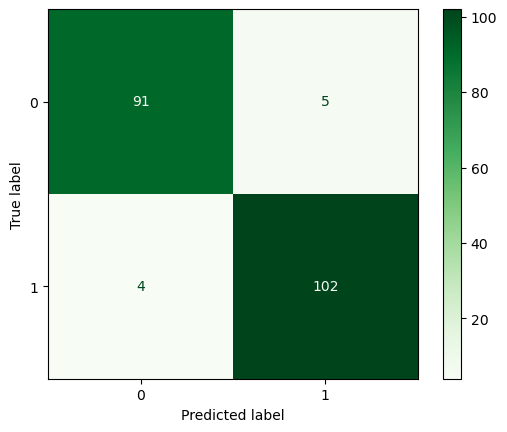

In [47]:
fcm = confusion_matrix(ny_test, final_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=fcm)
disp.plot(cmap="Greens")
plt.show()